## Chapter 4 Estimation
#### MA 189 Data Dive Into Birmingham (with R)
##### _Blazer Core: City as Classroom_

Course Website: [Github.com/kerenli/statbirmingham/](https://github.com/kerenli/statbirmingham/) 


#### Levels:
<div class="alert-success"> Concepts and general information</div>
<div class="alert-warning"> Important methods and technique details </div>
<div class="alert-info"> Extended reading </div>
<div class="alert-danger"> (Local) Examples, assignments, and <b>Practice in Birmingham</b> </div>

##### <div class="alert alert-block alert-success"> Introduction </div>

In this section, we will learn about a concept called a confidence interval in which we are some level confident that a population parameter falls in a certain range of values. Take a look at the following results from the U.S. Census Bureau that provides a 90% Confidence Interval (consisting of the Lower Bound Estimate and the Upper Bound Estimate) of Median Household Income for Alabama each year for the last two decades, being sure to read the "Notes" explanation below the graph:

[![Reading: Alabama Median Household Income (Lower Bound of Confidence Interval)](https://fred.stlouisfed.org/series/MHICILBAL01000A052NCEN)](https://fred.stlouisfed.org/series/MHICILBAL01000A052NCEN)





[![Reading: Alabama Median Household Income (Upper Bound of Confidence Interval)](https://fred.stlouisfed.org/series/MHICIUBAL01000A052NCEN)](https://fred.stlouisfed.org/series/MHICIUBAL01000A052NCEN)



By the end of this chapter, you will have the skills to draw conclusions about a population (parameter) value based on data from a sample, as well as how to determine a sufficient sample size. 

### Point Estimation and Confidence Intervals

##### <div class="alert alert-block alert-success"> Point Estimation </div>

* A __point estimate__ is a single number that is our best guess for the parameter.
* An __interval estimate__ is an interval of numbers that is believed to contain the actual value of the parameter.



<div class="alert alert-block alert-danger"><b>Local Example:</b> Estimates in Birmingham</div>

Bham Now (https://bhamnow.com/) is a positive, modern news source with a mission "to create a smarter, happier, healthier, inspired, involved and prosperous Birmingham" and works closely with local businesses. They did a survey containing a variety of questions in which 2,480 people responded.

1. What percent of people who took the Bham Now survey do YOU think "recognize the importance of supporting local"?  <br>

2. What was the actual result found here (point estimate)? https://bhamnow.com/2023/08/08/2480-bham-now-survey-results/

3. I am 100% confident that the proportion of people in Birmingham who believe in the importance of supporting local businesses is between what two values (interval)?

We want to be able to find a smaller interval than your answer in part 3 by allowing a slightly smaller confidence level that the interval contains the true proportion. 




##### Your answer:

##### <div class="alert alert-block alert-success">Confidence Intervals</div>

* The __margin of error__ measures how accurate the point estimate it likely to be in estimating a parameter.
* A __confidence interval__ is an interval containing the most believable values for a parameter and the probability that it does contain the parameter value is called the confidence level, $c$.


##### Overall Steps for Determining a Confidence Interval: 
1. Collect data from a sample and find the sample statistic (point estimate).
2. Find the margin of error (techniques described below) and add/subtract.
3. Conclude that we are $c$x100% confidence that the actual value of the parameter will be within that interval.



* __Confidence Interval for One Proportion__: $\hat{p}\pm z^*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$

* __Confidence Interval for One Mean__: $\bar{x}\pm t^*\frac{s}{\sqrt{n}}$

Note: Use the following criteria to decide whether you should choose a normal distribution or a t-distribution
for making confidence intervals for a population mean. t distribution: Use if the population standard deviation,
$σ$, is not known and the population is normally distributed OR the sample size, n, is greater than 30.
Normal distribution: Use if the population standard deviation, $σ$, is known and the population is normally
distributed OR the sample size, n, is greater than 30.
Note: If the population is not normal and the sample size is less than or equal to 30, then neither of
these distributions can be used.


Interpretation of confidence intervals: 
* We are $c$x100% confident that our confidence interval contains the true value of the population parameter. <br>
OR <br>
* There is a $.c$ probability that the point estimate falls within the margin of error of the population parameter. <br> 
OR <br>
* We are $c$x100% confident that the point estimate falls with the margin of error of the population parameter. 
    

Note that we CAN say something about the probability of the point estimate but NOT of the true population parameter. For example, we CANNOT say "There is a .95 probability that the population parameter lies in our confidence interval" - it either does or doesn't so it's a probability of 1 or 0. 

<div class="alert alert-block alert-danger"><b>Example:</b> Financial Crisis of 2008</div>


    
[The 2008 Crash: What Happened to All That Money?](https://www.history.com/news/2008-financial-crisis-causes)
This article offers an overview of the financial crisis in 2008, explaining how financial institutions relied on faulty assumptions and underestimated the likelihood of a housing market collapse. It also touches on how financial models failed to account for rare, extreme events (tail risks) that ultimately led to the global economic downturn.

"...And financiers regarded them as reliable, pointing to data and trends dating back decades. Americans almost always made their mortgage payments. The only problem with relying on those data and trends was that American laws and regulations had recently changed. ..."
    
    
Key Takeaway: Assumptions matter. 

<div class="alert alert-block alert-warning">
<b>Technique</b>: Margin of Error for Estimating a Proportion
</div>



* For a confidence level $c$, the __critical value__, $z^*$, is the positive number such that the area under the standard normal curve between $-z^*$ and $z^*$ equals $c$: $P(-z^*<z<z^*)=c.$ 

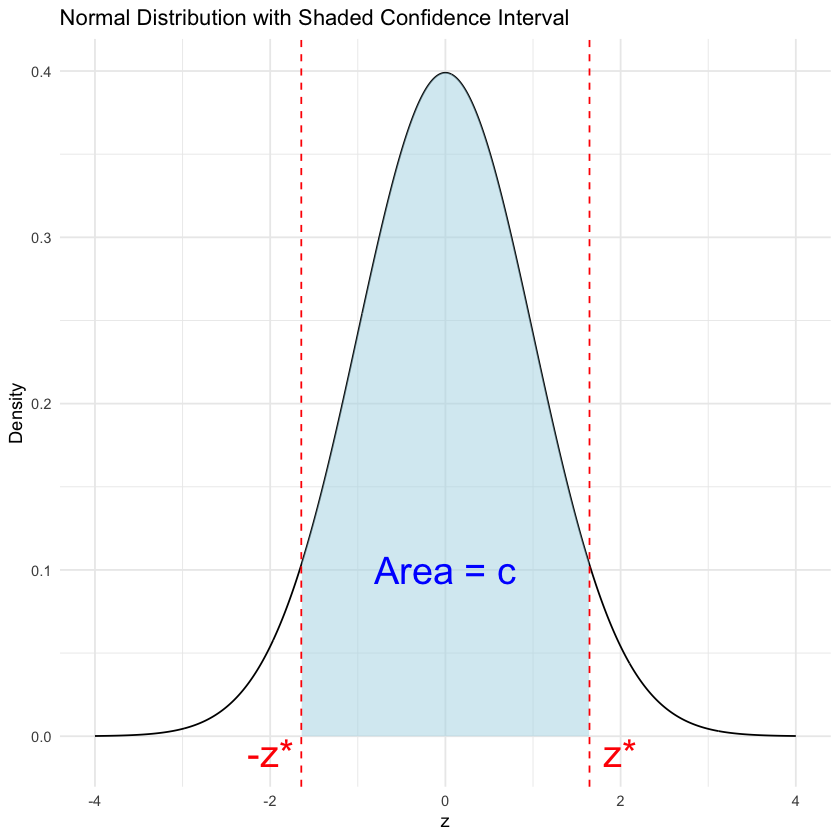

In [16]:
library(ggplot2)

# Define critical value for 90% confidence level (you can adjust as needed)
z_star <- qnorm(0.95)

# Create a sequence of values from -4 to 4 for z
z_values <- seq(-4, 4, length.out = 1000)

# Calculate the normal distribution density for these z-values
density_values <- dnorm(z_values)

# Create the data frame for ggplot2
data <- data.frame(z = z_values, density = density_values)

# Plot the normal distribution with shaded area and annotate the area as c
ggplot(data, aes(x = z, y = density)) +
  geom_line(color = "black") +  # Line for normal distribution
  geom_area(data = subset(data, z >= -z_star & z <= z_star), 
            aes(x = z, y = density), fill = "lightblue", alpha = 0.5) +  # Shaded area
  geom_vline(xintercept = c(-z_star, z_star), linetype = "dashed", color = "red") +  # Critical values
  labs(title = "Normal Distribution with Shaded Confidence Interval",
       x = "z", y = "Density") +
  annotate("text", x = 0, y = 0.1, label = "Area = c", color = "blue", size = 8) +  # Annotate the area as c
  annotate("text", x = -z_star-0.35, y = -0.01, label = "-z*", color = "red", size =8) +
  annotate("text", x = z_star+0.35, y = -0.01, label = "z*", color = "red", size =8) +
  theme_minimal()

We use the $z-$score table to find area to the left to find the appropriate $z^*$ value. 


<p align="center">
    <img src="../pics/zscoresnegative.png" alt="Figure 1" style="width:70%;"/>
</p>

<p align="center">
    <img src="../pics/zscorespositive.png" alt="Figure 1" style="width:70%;"/>
</p>



We use the critical value $z^*$ when the sampling distribution is approximately normal. We check requirements to make sure. 

* Requirements: <br>
Data obtained by randomization<br>
$n\hat{p}\geq 15$<br>
$n(1-\hat{p})\geq 15$<br><br>

* Confidence Interval for $p$:<br>
point estimate $\pm$ margin of error <br>
point estimate $\pm$ (critical value)(standard error) <br>
$\hat{p}\pm z^*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$ <br>
Confidence Interval: ($\hat{p}- z^*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$, $\hat{p}+ z^*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$) <br>
Conclusion: We are $c$x100% confident that the interval from $\hat{p}- z^*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$ to $\hat{p}+ z^*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$ is one that contains the population proportion of (whatever is being estimated). 

Warning: We cannot say "There is a 95% probability that the population proportion falls in this confidence interval." (It either does or doesn't and we can only speak on our confidence of it). 




<div class="alert alert-block alert-danger">
<b>Local Example</b>: UAB Campus Engagement Survey
    
</div>

In 2023, UAB administered a Campus Engagement Survey for faculty and staff. Assume a random sample of individuals completed the survey. Results are shown here: https://uab.app.box.com/v/2023-University-Wide-Scorecard

Out of the survey respondents, 87\% positively agreed with the statement "The work I do is meaningful to me." 

Questions that could be considered would be:

1. Construct a 95\% confidence interval for the true proportion of campus employees that believe their work is meaningful. 
2. Let's say UAB has an overall goal for 96\% of their employees to find meaning in their work and will take measures to support this if needed. Based on your confidence interval, would UAB need to take action steps to support this effort?


##### Your answer:

<div class="alert alert-block alert-danger">
<b>Student Local Practice: </b>UAB Campus Engagement Survey
   
</div>

In 2023, UAB administered a Campus Engagement Survey for faculty and staff. Assume a random sample of individuals completed the survey. Results are shown here: https://uab.app.box.com/v/2023-University-Wide-Scorecard

Out of the survey respondents, 80\% positively agreed with the statement "At this institution, diversity in all of its forms is valued."

Questions that could be considered would be:

1. Construct a 99\% confidence interval for the true proportion of campus employees that believe that diversity in all of its forms is valued at UAB.
2. Do you think this is a smaller or larger interval than a 95\% confidence interval for this question?


##### Your answer:

<div class="alert alert-block alert-warning">
<b>Technique</b>: Margin of Error for Estimating a Mean
</div>

* For a confidence level $c$, the __critical $t$-value__, $t^*$, is the positive number such that the area under the $t-$ distribution between $-t^*$ and $t^*$ equals $c$: $P(-t^*<t<t^*)=c.$ *Note: $t^*$ depends on both $n$ and $c$.* We use the $t-$score table to find area corresponding to a particular confidence interval and degrees of freedom to find the appropriate $t^*$ value. 




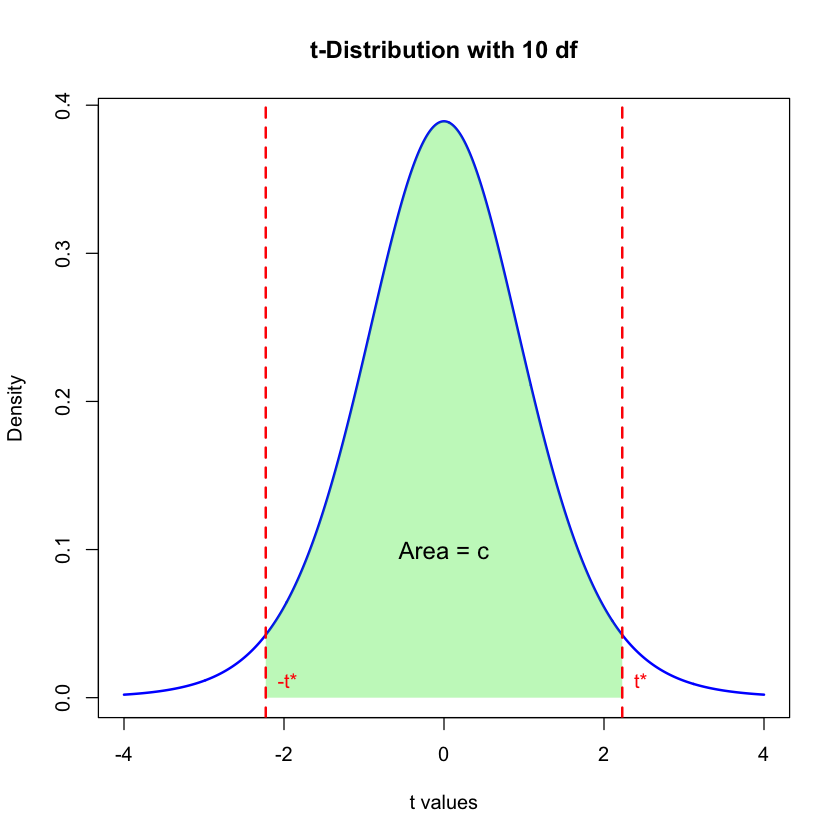

In [1]:
# critical values of t distribution
confidence_level <- 0.95  # 95% confidence level
df <- 10  # Degrees of freedom

# Calculate the critical t-value for the given confidence level and df
t_star <- qt((1 + confidence_level) / 2, df)

# Create a sequence of x values to plot the t-distribution
x_values <- seq(-4, 4, length = 1000)

# Calculate the t-distribution (density) for each x value
y_values <- dt(x_values, df)

# Plot the t-distribution
plot(x_values, y_values, type = "l", lwd = 2, col = "blue",
     xlab = "t values", ylab = "Density",
     main = paste("t-Distribution with", df, "df"))

# Shade the area under the curve between -t* and t*
x_shade <- seq(-t_star, t_star, length = 500)
y_shade <- dt(x_shade, df)
polygon(c(-t_star, x_shade, t_star), c(0, y_shade, 0), col = rgb(0.1, 0.9, 0.1, 0.3), border = NA)

# Add vertical lines at -t* and t*
abline(v = c(-t_star, t_star), col = "red", lwd = 2, lty = 2)

# Annotate the shaded area as the confidence level
text(-t_star, 0.01, "-t*", pos = 4, col = "red")
text(t_star, 0.01, "t*", pos = 4, col = "red")
text(0, 0.1, "Area = c", col = "black", cex = 1.2)

Note: $df=n-1$

##### t-Distribution Table (Critical Values)

| Degrees of Freedom (df) | 90% CI (α = 0.10) | 95% CI (α = 0.05) | 98% CI (α = 0.02) | 99% CI (α = 0.01) |
|-------------------------|-------------------|-------------------|-------------------|-------------------|
| 1                       | 6.314             | 12.706            | 31.821            | 63.657            |
| 2                       | 2.920             | 4.303             | 6.965             | 9.925             |
| 3                       | 2.353             | 3.182             | 4.541             | 5.841             |
| 4                       | 2.132             | 2.776             | 3.747             | 4.604             |
| 5                       | 2.015             | 2.571             | 3.365             | 4.032             |
| 6                       | 1.943             | 2.447             | 3.143             | 3.707             |
| 7                       | 1.895             | 2.365             | 2.998             | 3.499             |
| 8                       | 1.860             | 2.306             | 2.896             | 3.355             |
| 9                       | 1.833             | 2.262             | 2.821             | 3.250             |
| 10                      | 1.812             | 2.228             | 2.764             | 3.169             |
| 11                      | 1.796             | 2.201             | 2.718             | 3.106             |
| 12                      | 1.782             | 2.179             | 2.681             | 3.055             |
| 13                      | 1.771             | 2.160             | 2.650             | 3.012             |
| 14                      | 1.761             | 2.145             | 2.624             | 2.977             |
| 15                      | 1.753             | 2.131             | 2.602             | 2.947             |
| 20                      | 1.725             | 2.086             | 2.528             | 2.845             |
| 25                      | 1.708             | 2.060             | 2.485             | 2.787             |
| 30                      | 1.697             | 2.042             | 2.457             | 2.750             |
| ∞                       | 1.645             | 1.960             | 2.326             | 2.576             |



We use the critical value $t^*$ when the sampling distribution is a t-distribution. We check requirements to make sure. 

* Requirements: <br>
Data must be obtained by randomization<br>
An approximately normal population OR $n\geq 30$<br><br>

* Confidence Interval for $\mu$:<br>
point estimate $\pm$ margin of error <br>
point estimate $\pm$ (critical value)(standard error) <br>
$\bar{x}\pm t^*\frac{s}{\sqrt{n}}$ <br>
Confidence Interval: ($\bar{x}- t^*\frac{s}{\sqrt{n}}$, $\bar{x}+ t^*\frac{s}{\sqrt{n}}$) <br>
Conclusion: We are $c$x100% confident that the interval from $\bar{x}- t^*\frac{s}{\sqrt{n}}$ to $\bar{x}+t^*\frac{s}{\sqrt{n}}$ is one that contains the population proportion of (whatever is being estimated). 

Warning: We cannot say "There is a 95% probability that the population mean falls in this confidence interval." (It either does or doesn't and we can only speak on our confidence of it). 






<div class="alert alert-block alert-danger">
<b>Local Application</b>: Alabama Power Company Customer Loads
   
</div>

Consider the 2020 energy used in kilowatt hours by customer for 4 different customers of Alabama Power Company given below. Consider Customer 1. 

Questions one could answer would be:

1. Randomly select 100 days from the 2020 dataset from Customer 1. Find the average amount of energy used daily by this customer for that sample of 2020, as well as the standard deviation.
2. Construct a 95\% confidence interval for the amount of energy used daily by Customer 1 in 2020. 
3. State what your confidence interval tells you. 
3. Now, find the average and standard deviation for the amount of energy used considering all days in 2020 for Customer 1. Consider this result in relation to your confidence interval and write a conclusion. 






In [13]:
# Lambdas and RTP Customer Loads
if (!require(readxl)) {
  install.packages("readxl")
  library(readxl)
}

# Define the path to the Excel file
file_path <- "data/Lambdas and RTP Customer Loads .xlsx"

# Read the Excel file from the "data" subfolder
lambda_data <- read_excel(file_path, skip = 2)

# Illustrate the content: Display the first few rows of the data
lambda_data

date_val,timezone,hour01,hour02,hour03,hour04,hour05,hour06,hour07,hour08,⋯,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,hour24
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-01,CPT,26.935,28.190,33.558,34.005,36.075,35.430,41.828,35.3470,⋯,36.296,33.8530,39.0320,205.5950,294.030,294.030,294.0300,294.0300,203.640,203.640
2018-01-02,CPT,203.640,203.640,203.640,203.640,294.030,294.030,339.740,339.7400,⋯,37.798,34.4520,294.0300,294.0300,294.030,294.030,294.0300,339.7400,339.740,339.740
2018-01-03,CPT,339.740,255.060,255.060,255.060,294.030,294.030,294.030,294.0300,⋯,36.962,38.4570,34.4070,228.9300,228.930,228.930,228.9300,228.9300,228.930,37.042
2018-01-04,CPT,33.399,36.591,41.662,313.310,329.260,329.260,329.260,380.3357,⋯,37.872,41.0610,331.5950,419.8940,424.110,454.860,454.8600,529.5180,519.966,454.860
2018-01-05,CPT,520.001,454.860,454.860,520.057,530.605,530.729,530.729,454.8600,⋯,33.930,34.3460,46.2920,168.1890,41.057,43.341,46.6370,418.6100,418.610,203.980
2018-01-06,CPT,203.980,203.980,203.980,208.710,418.610,418.610,418.610,418.6100,⋯,36.791,252.9413,159.0917,159.6169,205.650,205.650,205.6500,205.6500,205.650,244.040
2018-01-07,CPT,244.040,244.040,201.930,257.140,201.930,201.930,201.930,350.7882,⋯,37.583,39.3140,365.3110,45.6890,201.930,201.930,176.6292,166.0164,33.969,32.644
2018-01-08,CPT,27.660,29.015,28.143,28.739,32.343,48.091,204.220,205.6500,⋯,33.140,32.8330,31.5260,33.4950,33.601,31.680,29.9410,27.9280,25.998,21.320
2018-01-09,CPT,21.029,19.629,20.035,20.111,22.414,27.702,31.594,27.4020,⋯,19.993,19.9950,20.1380,20.1780,20.182,20.058,19.7810,19.1870,18.936,19.211


##### Your answer:

### Sample Size Determination

##### <div class="alert alert-block alert-success"> Sample Size for a Population Proportion </div>

Recall: The margin of error used in calculating a confidence interval for a population proportion using a point estimate is given by $$ME=z^*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

Notice it depends on the sample size, $n$.  


<div class="alert alert-block alert-danger">
<b>Example</b>: Solve for Sufficient Sample Size Formula
</div>

Using $ME=z^*\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$, solve for $n$. 

##### Your answer:

<div class="alert alert-block alert-danger">
<b>Local Example</b>: Sufficient Sample Size for Proportion of UAB Students Lactose Intolerant
</div>

You are interested in determining the proportion of UAB students who are lactose intolerant. You want to be 95\% confident that the estimate is within 3 percentage points of the true proportion. A question to consider might be: How large of a sample should you use? (If no $\hat{p}$ is available, use $\hat{p}=\frac{1}{2}$).

##### Your answer:

<div class="alert alert-block alert-danger">
    <b>Student Local Practice: </b> UAB lactose intolerance
</div>

Let's say you've done a survey at UAB and calculated a 95\% confidence interval of (0.116, 0.158) for the proportion of those who are lactose intolerant. Your friend is then interested in determining the proportion of Alabamians who are lactose intolerant. Your friend wants to be 95\% confident that the estimate is within 3 percentage points of the true proportion. How large of a sample should your friend use? 



##### Your answer:

 ##### <div class="alert alert-block alert-success">Sample Size for a Population Mean </div>


Recall: The margin of error used in calculating a confidence interval for a population mean using a point estimate (assuming we are working with the t-distribution) is given by $$ME=t^*\frac{s}{\sqrt{n}}$$

Notice it depends on the sample size, $n$. <br>
Note: If we were working with the normal distrubtion, we would use $z^*$ and $\sigma$ instead (as seen in the lab this week). 



<div class="alert alert-block alert-danger"><b>Example</b>: Solve for Sufficient Sample Size Formula </div>

Using $ME=t^*\frac{s}{\sqrt{n}}$, solve for $n$.

##### Your answer:

<div class="alert alert-block alert-danger"><b>Local Application</b>: Sufficient Sample Size for Mean of Actuary Salary in Birmingham </div>

A question one could consider would be: You are interested in becoming an actuary (https://www.bls.gov/ooh/math/actuaries.htm) but first want to design a study to estimate the average income of an actuary in the Birmingham area specifically. You want to determine with 90\% confidence what the average income is and wish to be accurate within \$3,000. 

You estimate the standard deviation to be about \$9,000 due to national information. What sample size of actuaries in the Birmingham area should you use and what is your confidence interval?

##### Your answer: